In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
url = 'http://www.cse.chalmers.se/~richajo/dit866/data/CTG.csv'
data = pd.read_csv(url, skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

# Peeking at the data
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,7.6,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,5.2,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,7.8,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,9.4,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,5.6,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


# step 2
dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier(strategy='most_frequent')
cross_val_score(clf, Xtrain, Ytrain)

array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

# Step 3
testing:
decision trees, random forrest, gradient boost, perceptron and logistig regression

In [ ]:
# Tree-based classifiers
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Linear classifiers
from sklearn.linear_model import Perceptron, LogisticRegression

# some additional useful packages
import numpy as np
import matplotlib.pyplot as plt

depth =  9 score =  0.9323529411764706


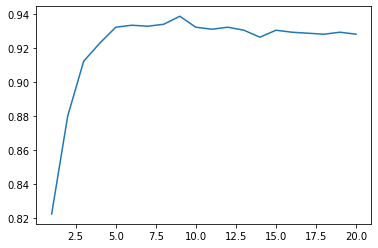

In [ ]:
# Decision tree
it = 20
avg_acc = [] # used to store average accuracy for each depth
acc = np.zeros(5) # used to store accuracy of every model

# looping over different values for max_depth
for xt in range(it): 
  clf_df = DecisionTreeClassifier(max_depth = xt+1)
  score = cross_val_score(clf_df, Xtrain, Ytrain, cv=10)

  # saving the mean cross validation score wich is in this case accuracy
  avg_acc.append(np.mean(score)) 

# plotting how the accuracy changes with different parameter values
plt.plot(range(1,21), avg_acc)

# saving the best value
best = np.argmax(avg_acc) + 1
acc[0] = avg_acc[best]

# printing the best value and it's value for the hyper parameter max_depth
print('depth = ', best, 'score = ', avg_acc[best])


depth =  15 score =  0.9370588235294118


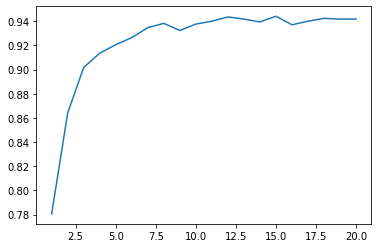

In [ ]:
# Random forrest
# method is similar to the one used for decision tree, since we are only tuning
# the hyper parameter max_depth here as well.

it = 20
avg_acc = [] 

for xt in range(it):
  clf_rf = RandomForestClassifier(max_depth = xt+1)
  score = cross_val_score(clf_rf, Xtrain, Ytrain, cv=10)
  avg_acc.append(np.mean(score))

plt.plot(range(1,21), avg_acc)
best = np.argmax(avg_acc) + 1

acc[1] = avg_acc[best]

print('depth = ', best, 'score = ', avg_acc[best])


Now we are going to save he accuracy for the remaining methods. It is not necissary to tune the parameters that much at this moment so we will just use the default. 

In [ ]:
# Gradent boost
clf_gb = GradientBoostingClassifier()
acc[2] = np.mean(cross_val_score(clf_gb, Xtrain, Ytrain))


In [ ]:
# Perceptron
clf_per = Perceptron()
acc[3] = np.mean(cross_val_score(clf_per, Xtrain, Ytrain))

In [110]:
# Logistic regression

# we need to scale the data for logistic regression
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(Xtrain) 
Xtrain_scaled = scaler.transform(Xtrain)

clf_lg = LogisticRegression()
acc[4] = np.mean(cross_val_score(clf_lg, Xtrain_scaled, Ytrain))


0.891764705882353


In [111]:
print(acc)

[0.93235294 0.93705882 0.95       0.82529412 0.89176471]


## Conclusion

As we can see Gradient boost acheived the best cross validation score 0.95. So inte the following step we will be taking a closer look at this model.

# Step 4

In [ ]:
from itertools import product

learning_rates = [0.7, 0.6, 0.5, 0.4, 0.3, 0.1]
n_estimators = [64, 128, 256, 512, 1024, 2048, 4096]
max_depths = range(2,5)

best = 0 
score = 0

params = [0, 0, 0]
count = 0

# to find the best values we are doing an exhaulstic search
# this takes a while but it is an easy way for finding the best hyper-parameter
# values
for lr, n_est, mx_dp in product(learning_rates, n_estimators, max_depths):

  # printing out the progress
  print(count/(len(learning_rates)*len(n_estimators)*len(max_depths))) 

  # printing 
  clf_gb = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_est,
                                      max_depth = mx_dp)
  score = np.mean(cross_val_score(clf_gb, Xtrain, Ytrain, n_jobs = -1))

  if score > best:
    best = score
    params = [lr, n_est, mx_dp]
  
  count+=1


print(best, params)

0.0
0.007936507936507936
0.015873015873015872
0.023809523809523808
0.031746031746031744
0.03968253968253968
0.047619047619047616
0.05555555555555555
0.06349206349206349
0.07142857142857142
0.07936507936507936
0.0873015873015873
0.09523809523809523
0.10317460317460317
0.1111111111111111
0.11904761904761904


In [128]:

print(best, params)

0.9529411764705882 [0.5, 256]
